# What is Fine-Tuning and Transfer Learning? 👽
---


For a moment, let's take a small step back from the nitty-gritty details of EfficientNet.🕊Imagine that a bird could pass on to you what it has learned. Or what you have learned you could pass to a fish-sounds crazy, right? 
Let's just say, I have learned since I was born and from my ancestors to recognize a glass. There are simple features (edge, corner, shape, material structure, etc.). Turns out, something happens when machines learn-they transfer what they know and learn to other machines, skipping  the full learning process. 

 
**Let us start with a computer vision problem, but I am talking about a method that can be applied to many types of data and problems. So there is a dataset inside the object you want to recognize, but the dataset is too big (this is awesome 😃), the model is also very successful (again, which is awesome 🤗), but it will take days and weeks to train that model for that dataset. It's trained here though!**  🧐
 

---
 
 ![](https://a4.pbase.com/o4/98/367898/1/59218520.tn_Braintransferwatercolor.jpg)
 
 
 ![Transfer Learning](https://raw.githubusercontent.com/ayyucekizrak/TransferLearning_FineTuning/master/TL_FT.png)

---

🎯 **#1 Version:** When we use these parameters only for the model, we do not make a new neural network design for testing. We can use the entire pre-trained model for testing. This method is used especially in mobile and real-time prediction systems that do not require real-time learning. Periodic training can be updated with larger data and system performance can be improved.

🎯 **#2 Version:**  We take a part of the trained model and then train it for the data of our own problem which is not in the dataset. When we do this, we reduce the computational cost, that is,  we save time. At the same time, even if our data is limited to our own problem, this method achieves a higher performance in terms of the basic features learned in large datasets. But there are strategies that we need to pay attention to when implementing this method.

> * How similar or different the data we use to the data set of the pre-trained model

> * Size of the data we will use

With the following scheme, we can simply determine how we can make a choice.


![](https://github.com/ayyucekizrak/TransferLearning_FineTuning/blob/master/TL_FN2.png)


 🕵 So let's look at a simple example of how we can use a test process that we can run edge!

### 🔥For this purpose, ResNet50 was trained with deep neural networks for the IMAGENET dataset and weight parameters were recorded at the end of the training.

---
 ✏️ **Use the links below for more resources:**

[Comparison of Activation Functions for Deep Neural Networks](https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a)

[Step-by-Step Use of Google Colab’s Free TPU](https://medium.com/deep-learning-turkiye/ad%C4%B1m-ad%C4%B1m-google-colab-%C3%BCcretsiz-tpu-kullan%C4%B1m%C4%B1-621dc6e5487dhttps://heartbeat.fritz.ai/step-by-step-use-of-google-colab-free-tpu-75f8629492b3)

---


### Google Colab authentication

Show must go on!

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# EXAMPLE FOR VERSION OF #1

### Importing necessary libraries
⏬⏬⏬

In [0]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

Using TensorFlow backend.


### Transfer Learning: Testing ResNet 50 Deep Learning Model which is trained with IMAGENET dataseti

For more information about [ResNet50](https://medium.com/deep-learning-turkiye/deri%CC%87ne-daha-deri%CC%87ne-evri%C5%9Fimli-sinir-a%C4%9Flar%C4%B1-2813a2c8b2a9) Deep Learning Model and [ImageNet](https://medium.com/deep-learning-turkiye/motivasyon-yapay-zeka-ve-derin-%C3%B6%C4%9Frenme-48d09355388d) dataset! Please click the links.

In [0]:
model = ResNet50(weights="imagenet")














102858752/102853048 [==============================] - 3s 0us/step


In [0]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
# PRINT THE TOTAL NUMBER OF PARAMETERS IN THE MODEL
model.count_params() 

25636712

In [0]:
def prepare_image(image, target):
	# input image resizing and preprocessing
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# import the processed image
	return image

### You can test by copying the URL of an Internet-source image. You will find that many classes can be easily categorized with the ImageNet dataset, which has thousands of categories.

In [0]:
#@title Paste the link of the image { vertical-output: true }
ImageURL = "https://3.bp.blogspot.com/-u2EcSH2R3aM/VM69jPZvvOI/AAAAAAAAYzk/xmjSdaDD06o/s1600/mercan_resif.jpg" #@param {type:"string"}

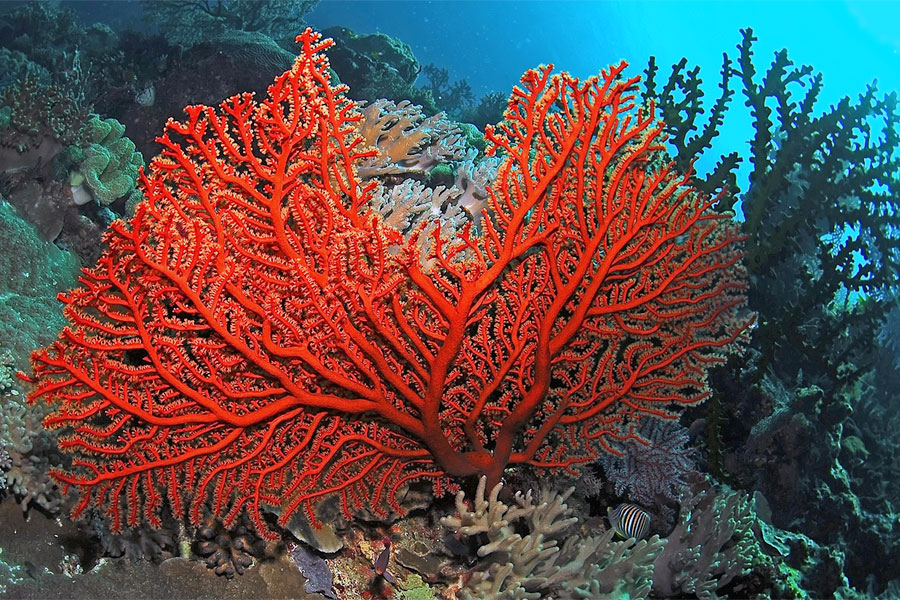

In [0]:
#ImageURL = "https://i.cnnturk.com/ps/cnnturk/75/650x0/57ad7dd9a781b6264026292d.jpg"
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

**If you want to read pictures from a file**

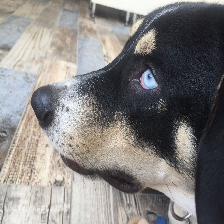

In [0]:
# root = 'drive/My Drive/'
# image_path = root+ 'Olips.png'
# image = Image.open(image_path)
# image = image.resize((224, 224))
# image
# Görüntüyü diziye çevir
# x = np.asarray(image, dtype='float32')
# Dizi listesine çevir
# x = np.expand_dims(x, axis=0)
# Giriş görüntüsünü eğitim setine uygun şekilde ön işlemleri yap 
# x = preprocess_input(x)
#preds = model.predict(x)
#print('Predicted:', decode_predictions(preds, top=3)[0])
#print(decode_predictions(preds, top=1)[0][0][1])

### Pre-processing and resizing the data you receive from the Internet and printing the first 5 predictions and prediction rates

For the image in the example, you can follow 91.9% probability **coral_reef**, 0.17% probability **sea_anemone** and other possibilities from the output of the cell.

In [0]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 

preds = model.predict(pre_image) # Apply preprocessed image to prediction model

results = imagenet_utils.decode_predictions(preds) #prediction
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet dataset's labels, probabilityand prediction results
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

40960/35363 [==================================] - 0s 0us/step
{'success': True, 'predictions': [{'label': 'coral_reef', 'probability': 0.9193242788314819}, {'label': 'sea_anemone', 'probability': 0.01701095513999462}, {'label': 'scuba_diver', 'probability': 0.014246568083763123}, {'label': 'sea_slug', 'probability': 0.009836888872087002}, {'label': 'sea_urchin', 'probability': 0.009407268837094307}]}


### En yüksek olasılıklı sonucun ekrana yazdırılması

In [0]:
print("The classification prediction is  {1} with the highest probability of {0}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# Print to the screen

The classification prediction is  coral_reef with the highest probability of 0.9193242788314819'dır.


 ### ⭐️[TensorFlow Hub](https://www.tensorflow.org/tutorials/images/hub_with_keras)⭐️
 ### ⭐️ [Transfer learning from pre-trained models](https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751)⭐️

# EXAMPLE FOR VERSION OF #2

### Importing necessary libraries
⏬⏬⏬

In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
from keras import backend as K
import pandas as pd
import numpy as np

Using TensorFlow backend.


## Resizing of the images
Pre-processing

In [0]:
img_width, img_height = 224, 224

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000 #eğitim örnek sayısı
nb_validation_samples = 800 #geçerleme örnek 
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)-

In [0]:
def preprocess_input_vgg(x):
    """
    Paremetreler
    ----------
    x :  numpy 3d sequence (a image is pre-processed)
      
    """
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X[0]

### Transfer Learning: Testing VGG 16 Deep Learning Model which is trained with IMAGENET dataseti

For more information about [VGGNet](https://medium.com/deep-learning-turkiye/deri%CC%87ne-daha-deri%CC%87ne-evri%C5%9Fimli-sinir-a%C4%9Flar%C4%B1-2813a2c8b2a9) Deep Learning Model and [ImageNet](https://medium.com/deep-learning-turkiye/motivasyon-yapay-zeka-ve-derin-%C3%B6%C4%9Frenme-48d09355388d) dataset! Please click the links.

We benefit from the Keras library at this step.

In [0]:
vgg16 = VGG16(weights='imagenet')

x  = vgg16.get_layer('fc2').output
prediction = Dense(2, activation='softmax', name='predictions')(x)

model = Model(inputs=vgg16.input, outputs=prediction)


# base_model = VGG16(weights='imagenet',include_top= False, input_shape=input_shape)

# x = base_model.output
# x = Flatten(name='flatten')(x)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
# prediction = Dense(2, activation='linear', name='predictions')(x)
# # prediction = Dense(output_dim=1, activation='sigmoid', name='logit')(x)

# top_model = Sequential()
# top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
# top_model.add(Dense(256, activation='relu'))
# top_model.add(Dropout(0.5))
# predictions = Dense(2, activation='linear', name='predictions')(top_model)
# top_model.load_weights('bootlneck_fc_model.h5')

# model = Model(input= base_model, output=prediction)

# fc2 = vgg16.get_layer('fc2').output
# prediction = Dense(units=2, activation='relu', name='logit')(fc2)
# model = Model(inputs=vgg16.input, outputs=top_model)

###  Freeze all the way to the fully-connected layer on the output for Fine-Tuning.

In [0]:
for layer in model.layers:
    if layer.name in ['predictions']:
        continue
    layer.trainable = False


df = pd.DataFrame(([layer.name, layer.trainable] for layer in model.layers), columns=['layer', 'trainable'])


train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(directory='data/train',
                                                    target_size=[img_width, img_height],
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
validation_generator = validation_datagen.flow_from_directory(directory='data/validation',
                                                              target_size=[img_width, img_height],
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

### Optimization Approach: Stochastic Gradient Descent and a Small Learning Rate

In [0]:
sgd = SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Optimizasyon Yöntemini ADAM ile de değiştirebilirsiniz
# model.compile(optimizer='nadam',
#                   loss='categorical_crossentropy',  # categorical_crossentropy if multi-class classifier
#                   metrics=['accuracy'])

# ERKEN DURDURMA DA EKLEYEBİLİRSİNİZ
# top_weights_path = 'top_model_weights_fine_tune.h5'
# callbacks_list = [
#         ModelCheckpoint(top_weights_path, monitor='val_acc', verbose=1, save_best_only=True),
#         EarlyStopping(monitor='val_acc', patience=5, verbose=0)]
    

# FINE-TUNING YAPMAK İÇİN
# model.fit_generator(train_generator,
#                     samples_per_epoch=16,
#                     nb_epoch=10,
#                     validation_data=validation_generator,
#                     nb_val_samples=32);

In [0]:
model.fit_generator(
        train_generator,
        # steps_per_epoch=16,
        steps_per_epoch=2000 // batch_size,
        epochs=4,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
        # validation_steps=32) #,
        # callbacks=callbacks_list)

### SAVING THE TRAINED MODEL- Weigths

In [0]:
               
model.save_weights('vgg16_tf_cat_dog_final_dense2.h5')

model_json_final = model.to_json()
with open("vgg16_tf_cat_dog_final_dense2.json", "w") as json_file:
    json_file.write(model_json_final)

### Steps to Display the Estimation Results

In [0]:
from IPython.display import display
import matplotlib.pyplot as plt

X_val_sample, _ = next(validation_generator)
y_pred = model.predict(X_val_sample)

nb_sample = 4
for x, y in zip(X_val_sample[:nb_sample], y_pred[:nb_sample]):
    s = pd.Series({'Cat': 1-np.max(y), 'Dog': np.max(y)})
    axes = s.plot(kind='bar')
    axes.set_xlabel('Class')
    axes.set_ylabel('Probability')
    axes.set_ylim([0, 1])
    plt.show()

    img = array_to_img(x)
    display(img)